# Matrix Operations

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider, FloatText
from IPython.display import display
import Geometry as geo

%matplotlib inline

plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.which"] = "both"

## Matrix Multiplication

Matrices are linear mappings between a domain and codomain.  Suppose we have the following vector $[0, 1]$

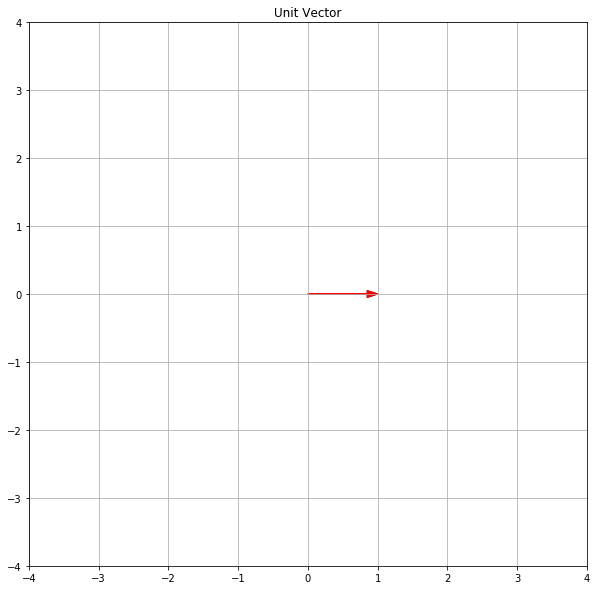

In [2]:
def unit_vec_transform(title, transformation = np.array([[1, 0], [0, 1]])):
    p1 = geo.Point(0, 0)
    p2 = geo.Point(1, 0)
    v1 = geo.Vector(p1, p2)
    v2 = v1.transform(transformation)
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    v1.plot_arrow(ax, head_width=0.1)
    v2.plot_arrow(ax, head_width=0.1, color="r")
    ax.set_title(title)

    return fig, ax

unit_vec_transform("Unit Vector");

That vector can be mapped from this domain, $x$, to a rotated codomain, $y$ by means of a linear transformation, $A$.

$$Ax = b$$

where $A = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$.

In the depiction below, the original vector is black, and the rotated one is red.

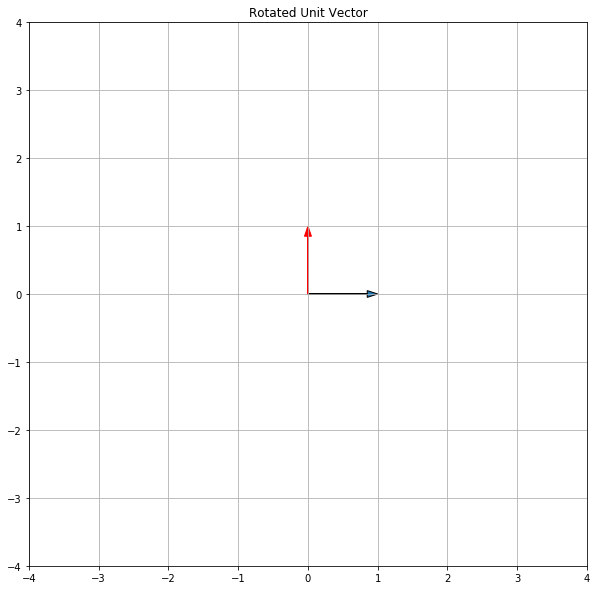

In [3]:
rotation = np.array([
    [0, 1],
    [1, 0]
])

unit_vec_transform("Rotated Unit Vector", rotation);

Rotations are just a special case that is easy to see, but any arbitrary real matrix can be used, so long as it is conformant with the dimension of the matrix being transformed. For example, here is the transformation (no longer a pure rotation) associated with $A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$.

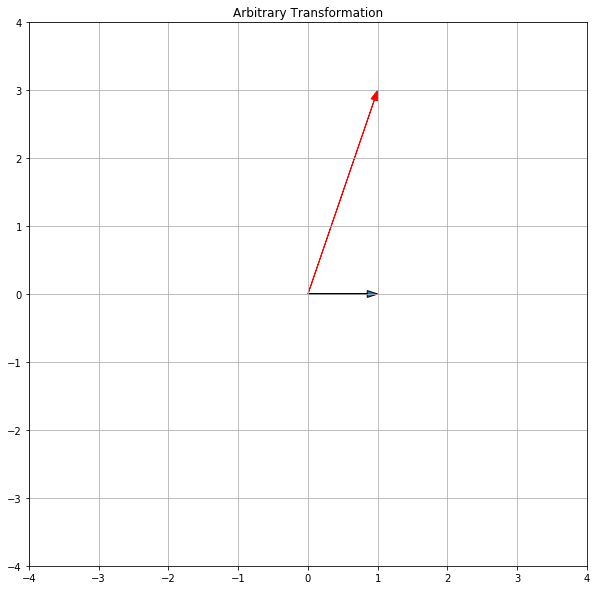

In [4]:
some_transform = np.array([
    [1, 2],
    [3, 4]
])

unit_vec_transform("Arbitrary Transformation", some_transform);

Note that the transformation here performs some element of rotation and some element of scaling. 

It should be noted that this transformation *operates on the entire domain*, not just our vector. Let us see define the basis of the plane as the two orthonormal vectors $[1, 0]$ and $[0,1]$ and apply the same transformation.

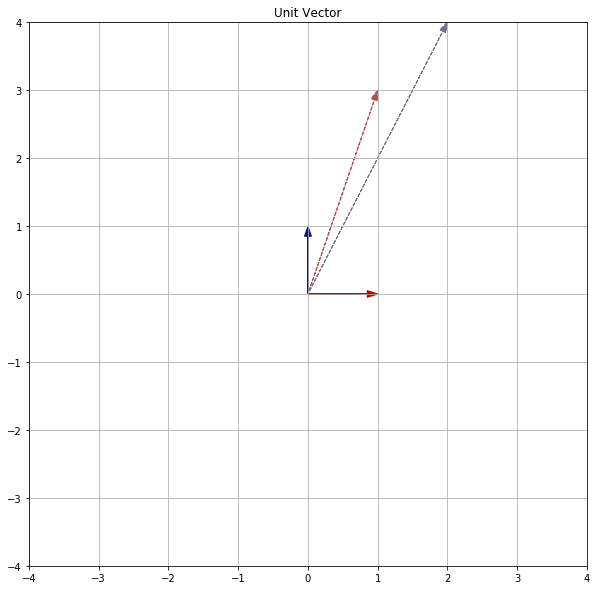

In [5]:
def basis_transform(title, transformation = np.array([[1, 0], [0, 1]])):
    p1 = geo.Point(0, 0)
    p2 = geo.Point(1, 0)
    p3 = geo.Point(0, 1)
    domain_vec1 = geo.Vector(p1, p2)
    domain_vec2 = geo.Vector(p1, p3)
    codomain_vec1 = domain_vec1.transform(transformation)
    codomain_vec2 = domain_vec2.transform(transformation)
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    domain_vec1.plot_arrow(ax, head_width=0.1, color = "#ba0000")
    domain_vec2.plot_arrow(ax, head_width=0.1, color = "#0f1580")
    codomain_vec1.plot_arrow(ax, head_width=0.1, color="#b55050", linestyle="--")
    codomain_vec2.plot_arrow(ax, head_width=0.1, color="#70728c", linestyle="--")
    ax.set_title(title)

    return fig, ax

basis_transform("Unit Vector", some_transform);

To really drive the point home, it is helpful to consider what a transformation does to a unit square. The deformation of the unit square is a proxy for the deformation of the entire domain. The original four vertices of our unit square maintain a relationship to one another that is consistent with the concept of a unit square. The only thing that is changing is that we are redefining how each point in the domain relates, such that we are really defining an entirely new domain (which is playing the role of the codomain in this case).

What the interactive example below makes clear is that we don't need to guess at the mechanical output of a transformation. It is, in fact, highly predictable. Each position in the transformation matrix has a particular job, and if we alter that position's value, the unit square will be deformed in a conceptually consistent way. For example, positively increasing the value in position $a_{00}$ will deform in a manner consistent with stretching the unit square along the $x$-axis.

In [17]:
def unit_square(title, a00 = 1, a01 = 0, a10 = 0, a11 = 1):
    p1 = geo.Point(0, 0)
    p2 = geo.Point(1, 0)
    p3 = geo.Point(1, 1)
    p4 = geo.Point(0, 1)
    domain = {
        "vec1": geo.Vector(p1, p2),
        "vec2": geo.Vector(p2, p3),
        "vec3": geo.Vector(p3, p4),
        "vec4": geo.Vector(p4, p1)
    }
    
    transformation = np.array([[a00, a01], [a10, a11]])
    codomain = {k:domain[k].transform(transformation) for k in domain.keys()}
    colors = {
        "vec1": "red",
        "vec2": "green",
        "vec3": "blue",
        "vec4": "orange"
    }
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    # This really is a foreach with unit return
    for k in domain.keys():
        domain[k].plot_arrow(ax, head_width=0.1, color = colors[k])
        codomain[k].plot_arrow(ax, head_width=0.1, color = colors[k], linestyle="-.")
    
    
# unit_square("Unit Square")
unit_square_interactive = interactive(
    unit_square, 
    title=fixed("Unit Square, Transformed"),
    a00=FloatText(min=-10, max=10, step=0.25, value=1),
    a01=FloatText(min=-10, max=10, step=0.25, value=0),
    a10=FloatText(min=-10, max=10, step=0.25, value=0),
    a11=FloatText(min=-10, max=10, step=0.25, value=1)
)

display(unit_square_interactive)

interactive(children=(FloatText(value=1.0, description='a00', step=0.25), FloatText(value=0.0, description='a0…